<a href="https://colab.research.google.com/github/nitinlodhi019/Deep-Learning/blob/main/Batch-Normalization/Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Batch normalization (BN) is a technique used to improve the training of deep neural networks. It normalizes the activations of a layer within a mini-batch, which helps to make the training process faster and more stable**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('/content/concertriccir2.csv')
data.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [ ]:
data= data.rename(columns={'7.003345706103683010e-01':'X', '-2.470675778972781789e-01':'Y', '0.000000000000000000e+00': 'Class'})
data.head()

,X,Y,Class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


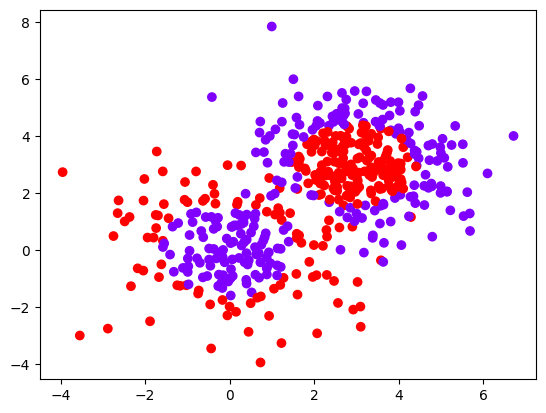

In [ ]:
plt.scatter(data['X'], data['Y'], c=data['Class'], cmap='rainbow')

In [ ]:
X = data.iloc[:, 0:2].values
y = data.iloc[:, -1].values


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

#Without BatchNormalization

In [ ]:
model1 = Sequential()
model1.add(Dense(2, activation='relu', input_dim=2))
model1.add(Dense(2, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history1= model1.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.5434 - loss: 0.6997 - val_accuracy: 0.4300 - val_loss: 0.8533
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5287 - loss: 0.7079 - val_accuracy: 0.4300 - val_loss: 0.8378
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5405 - loss: 0.7104 - val_accuracy: 0.4300 - val_loss: 0.8251
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5564 - loss: 0.7065 - val_accuracy: 0.4300 - val_loss: 0.8139
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5803 - loss: 0.6856 - val_accuracy: 0.4300 - val_loss: 0.8066
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5828 - loss: 0.6849 - val_accuracy: 0.4400 - val_loss: 0.8000
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5599 - loss: 0.6922 - val_accuracy: 0.4400 - val_loss: 0.7923
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5367 - loss: 0.7080 - val_accuracy: 0.

# With Batch normalization

In [ ]:
model2 = Sequential()
model2.add(Dense(2, activation='relu', input_dim=2))
model2.add(BatchNormalization())
model2.add(Dense(2, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 23 (92.00 B)

 Non-trainable params: 8 (32.00 B)

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2= model2.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.4715 - loss: 0.9381 - val_accuracy: 0.3900 - val_loss: 0.8211
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4388 - loss: 0.9036 - val_accuracy: 0.3800 - val_loss: 0.8038
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4079 - loss: 0.9603 - val_accuracy: 0.3600 - val_loss: 0.7881
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3916 - loss: 0.9089 - val_accuracy: 0.4100 - val_loss: 0.7739
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4634 - loss: 0.8821 - val_accuracy: 0.4400 - val_loss: 0.7627
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4986 - loss: 0.7945 - val_accuracy: 0.4400 - val_loss: 0.7520
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4999 - loss: 0.8337 - val_accuracy: 0.4300 - val_loss: 0.7421
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4833 - loss: 0.8272 - val_accuracy: 0.40

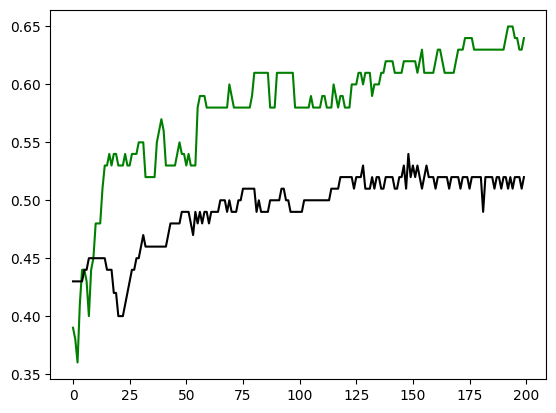

In [ ]:
plt.plot(history2.history['val_accuracy'], color='green')
plt.plot(history1.history['val_accuracy'], color='black')


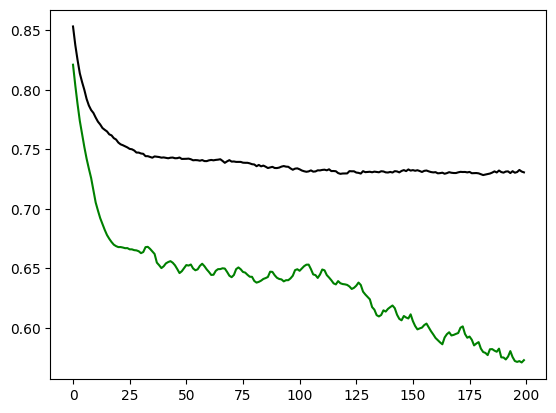

In [ ]:
plt.plot(history2.history['val_loss'], color='green')
plt.plot(history1.history['val_loss'], color='black')
